In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [5]:
results_file = './pbmc3k_processed.h5ad'
adata = sc.read_h5ad(results_file)

In [6]:
adata

AnnData object with n_obs × n_vars = 3309 × 1764 
    obs: 'n_genes', 'n_counts', 'percent_mito', 'louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [7]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain'] == '0')[0]
sc.pp.neighbors(adata, n_neighbors=10, method='gauss')
sc.tl.diffmap(adata, n_comps=10)
sc.tl.dpt(adata, n_dcs=10, n_branchings=1)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)
computing Diffusion Maps using n_comps=10(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99870956 0.99734926 0.99527806 0.9805793  0.9734638
     0.967684   0.96248734 0.9547226  0.95147204]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)


In [10]:
sc.tl.dpt(adata, n_dcs=10, n_branchings=4)

computing Diffusion Pseudotime using n_dcs=10
    this uses a hierarchical implementation
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:01)


In [8]:
adata

AnnData object with n_obs × n_vars = 3309 × 1764 
    obs: 'n_genes', 'n_counts', 'percent_mito', 'louvain', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'iroot', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'

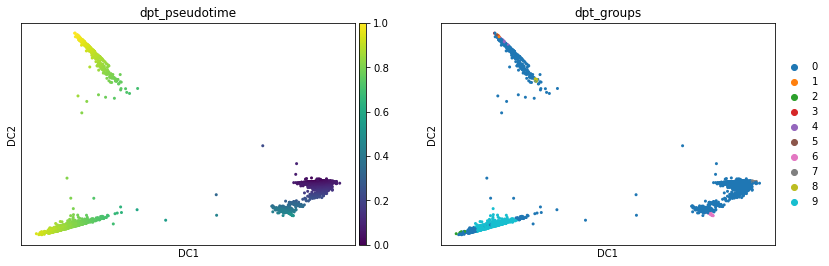

In [11]:
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'dpt_groups'])

In [11]:
adata.write(results_file)

In [47]:
adata

AnnData object with n_obs × n_vars = 3309 × 1764 
    obs: 'n_genes', 'n_counts', 'percent_mito', 'louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [42]:
type(adata.obs.louvain)

pandas.core.series.Series

In [43]:
adata.obs

,n_genes,n_counts,percent_mito,louvain
AAACCCACAGGCTTGC-1,1685,4428.0,0.119241,2
AAACCCAGTAGTTAGA-1,2291,7107.0,0.059519,2
AAACGAAGTGGATCAG-1,1850,4838.0,0.076685,2
AAACGAATCATGAGAA-1,1410,4244.0,0.047361,0
AAACGAATCGTCCTTG-1,1593,4055.0,0.101850,2
...,...,...,...,...
TTTGATCGTTACGCCG-1,1591,6504.0,0.089637,0
TTTGGAGAGGTAGCCA-1,1957,6569.0,0.051302,0
TTTGGAGGTATCGATC-1,1411,4803.0,0.083281,1
TTTGGTTCAATTTCCT-1,2850,8431.0,0.083146,2


In [44]:
adata.obs.fuck=adata.obs.louvain

d:\python-3.7.4-embed-amd64\python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [46]:
adata

AnnData object with n_obs × n_vars = 3309 × 1764 
    obs: 'n_genes', 'n_counts', 'percent_mito', 'louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [48]:
adata.obs['text'] = adata.obs['louvain']

In [49]:
adata.obs.text

AAACCCACAGGCTTGC-1    2
AAACCCAGTAGTTAGA-1    2
AAACGAAGTGGATCAG-1    2
AAACGAATCATGAGAA-1    0
AAACGAATCGTCCTTG-1    2
                     ..
TTTGATCGTTACGCCG-1    0
TTTGGAGAGGTAGCCA-1    0
TTTGGAGGTATCGATC-1    1
TTTGGTTCAATTTCCT-1    2
TTTGGTTGTTGGAGAC-1    0
Name: text, Length: 3309, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [50]:
e = adata.obs.louvain.values.tolist()

In [51]:
e

['2',
 '2',
 '2',
 '0',
 '2',
 '0',
 '5',
 '2',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '7',
 '2',
 '1',
 '2',
 '7',
 '0',
 '5',
 '7',
 '0',
 '0',
 '1',
 '1',
 '0',
 '2',
 '9',
 '4',
 '0',
 '9',
 '0',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '4',
 '1',
 '3',
 '0',
 '5',
 '5',
 '5',
 '3',
 '7',
 '1',
 '1',
 '2',
 '0',
 '4',
 '2',
 '2',
 '1',
 '4',
 '3',
 '3',
 '3',
 '5',
 '1',
 '4',
 '0',
 '6',
 '0',
 '4',
 '0',
 '0',
 '6',
 '0',
 '1',
 '1',
 '0',
 '6',
 '0',
 '5',
 '2',
 '2',
 '0',
 '4',
 '1',
 '6',
 '4',
 '4',
 '2',
 '0',
 '2',
 '3',
 '0',
 '2',
 '3',
 '7',
 '1',
 '5',
 '0',
 '0',
 '8',
 '4',
 '1',
 '5',
 '0',
 '0',
 '3',
 '1',
 '3',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '0',
 '9',
 '3',
 '0',
 '1',
 '0',
 '1',
 '5',
 '1',
 '2',
 '0',
 '1',
 '5',
 '0',
 '0',
 '8',
 '2',
 '2',
 '4',
 '0',
 '4',
 '4',
 '6',
 '8',
 '1',
 '1',
 '3',
 '9',
 '6',
 '5',
 '1',
 '4',
 '0',
 '4',
 '1',
 '2',
 '3',
 '1',
 '5',
 '0',
 '0',
 '9',
 '1',
 '1',
 '4',
 '5',
 '1',
 '0',
 '2'

In [52]:
adata.obs['fuck'] = pd.Series(e)

In [54]:
adata.obs.fuck

AAACCCACAGGCTTGC-1    2
AAACCCAGTAGTTAGA-1    2
AAACGAAGTGGATCAG-1    2
AAACGAATCATGAGAA-1    0
AAACGAATCGTCCTTG-1    2
                     ..
TTTGATCGTTACGCCG-1    0
TTTGGAGAGGTAGCCA-1    0
TTTGGAGGTATCGATC-1    1
TTTGGTTCAATTTCCT-1    2
TTTGGTTGTTGGAGAC-1    0
Name: louvain, Length: 3309, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [55]:
adata.obs.louvain

AAACCCACAGGCTTGC-1    2
AAACCCAGTAGTTAGA-1    2
AAACGAAGTGGATCAG-1    2
AAACGAATCATGAGAA-1    0
AAACGAATCGTCCTTG-1    2
                     ..
TTTGATCGTTACGCCG-1    0
TTTGGAGAGGTAGCCA-1    0
TTTGGAGGTATCGATC-1    1
TTTGGTTCAATTTCCT-1    2
TTTGGTTGTTGGAGAC-1    0
Name: louvain, Length: 3309, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [56]:
adata.obs['celltype'] = e

In [57]:
adata

AnnData object with n_obs × n_vars = 3309 × 1764 
    obs: 'n_genes', 'n_counts', 'percent_mito', 'louvain', 'text', 'fuck', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [58]:
adata.obs.celltype

AAACCCACAGGCTTGC-1    2
AAACCCAGTAGTTAGA-1    2
AAACGAAGTGGATCAG-1    2
AAACGAATCATGAGAA-1    0
AAACGAATCGTCCTTG-1    2
                     ..
TTTGATCGTTACGCCG-1    0
TTTGGAGAGGTAGCCA-1    0
TTTGGAGGTATCGATC-1    1
TTTGGTTCAATTTCCT-1    2
TTTGGTTGTTGGAGAC-1    0
Name: celltype, Length: 3309, dtype: object

In [59]:
sc.tl.louvain(adata, restrict_to=('louvain', ['2']), key_added='louvain')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain_R', the cluster labels (adata.obs, categorical) (0:00:02)


In [60]:
sc.tl.louvain(adata, restrict_to=('text', ['2']), key_added='text')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'text', the cluster labels (adata.obs, categorical) (0:00:00)


In [61]:
adata.obs.text

AAACCCACAGGCTTGC-1    2,0
AAACCCAGTAGTTAGA-1    2,1
AAACGAAGTGGATCAG-1    2,4
AAACGAATCATGAGAA-1      0
AAACGAATCGTCCTTG-1    2,2
                     ... 
TTTGATCGTTACGCCG-1      0
TTTGGAGAGGTAGCCA-1      0
TTTGGAGGTATCGATC-1      1
TTTGGTTCAATTTCCT-1    2,0
TTTGGTTGTTGGAGAC-1      0
Name: text, Length: 3309, dtype: category
Categories (15, object): [0, 1, 2,0, 2,1, ..., 6, 7, 8, 9]